# Simple Linear Regression
### *Predicting Life Expectancy: A Synthetic Example*

In this notebook, I use synthetic data that I generated to illustrate how to manually compute the coefficients of a simple linear regression.

## 1. Load the Data

In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('../data/life_expectancy_data.csv')

# display first few rows
print(df.head())

   yrs_school   life_exp
0   13.578595  52.713117
1   17.792642  57.841715
2   10.167224  47.758930
3    0.602007  33.257639
4   15.585284  57.082617


## 2. Compute Coefficients

Once we have properly loaded the data, we can simply compute the coefficients with a re-usable function we program:

In [3]:
def SLR_coefficients(X, y):
    """
    Calculate the coefficients for Simple Linear Regression.
    
    Parameters:
    X (array-like): Independent variable.
    y (array-like): Dependent variable.
    
    Returns:
    tuple: Intercept and slope of the regression line.
    """
    n = len(X)
    
    # Calculate slope
    num = np.sum(X * y) - n * np.mean(X) * np.mean(y)
    den = np.sum(X**2) - n * (np.mean(X))**2
    b1 = num / den  # slope

    # Calculate intercept
    b0 = np.mean(y) - b1 * np.mean(X)  # intercept
    
    return b0, b1

Once the function is ready, we compute the two coefficients on our data:

In [13]:
b0_1, b1_1 = SLR_coefficients(df['yrs_school'], df['life_exp'])
print(f"SLR Coefficients\nIntercept (b0): {b0_1}\nSlope (b1): {b1_1}")

SLR Coefficients
Intercept (b0): 37.494628041499226
Slope (b1): 1.0155605359752424


Finally, we realize a plot that we will integrate to the written report:

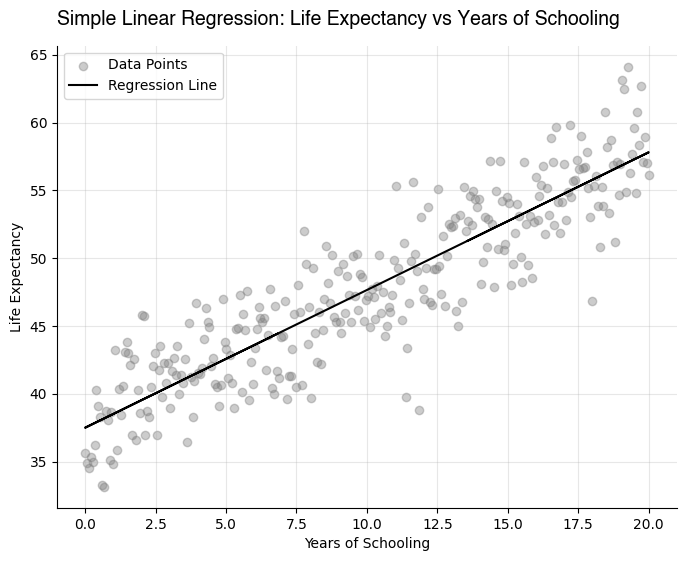

In [11]:
# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['yrs_school'], df['life_exp'], color='grey', label='Data Points', alpha=0.4)
ax.plot(df['yrs_school'], b0_1 + b1_1 * df['yrs_school'], color='black', label='Regression Line')

# labels and title
ax.set_xlabel('Years of Schooling')
ax.set_ylabel('Life Expectancy')
ax.set_title('Simple Linear Regression: Life Expectancy vs Years of Schooling',
             family="Helvetica", fontsize=14, loc='left', pad=15)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.3)

# show and save
plt.savefig('../figures/slr_life_expectancy.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Monte Carlo Simulation

In [1]:
# --- 1) Generate the synthetic data ---
# Orginally, I coded this in R, but here is the Python version:

import numpy as np
import pandas as pd

# reproducibility (optional)
np.random.seed(42)

# true parameters
beta_0 = 10
beta_1 = 2
beta_2 = -3

data_size = 1000

# means
mu_vec = np.array([100, 50])

# standard deviations
sd1 = 16
sd2 = 8

# target correlation
rho = 0.5

# covariance matrix
Sigma = np.array([
    [sd1**2,        rho * sd1 * sd2],
    [rho * sd1 * sd2,      sd2**2   ]
])

# bivariate sample
sim_data = np.random.multivariate_normal(mean=mu_vec, cov=Sigma, size=data_size)

X1 = sim_data[:, 0]
X2 = sim_data[:, 1]

# u ~ Uniform(-10, 10)
u = np.random.uniform(low=-10, high=10, size=data_size)

# Y
Y = beta_0 + beta_1 * X1 + beta_2 * X2 + u

complete_df = pd.DataFrame({"X1": X1, "X2": X2, "u": u, "Y": Y})
print(complete_df.head(3))

           X1         X2         u          Y
0   92.378599  46.727414 -1.857870  52.717086
1   86.764890  56.622675 -8.679803   4.981951
2  104.172166  49.629078 -3.023589  66.433509


In [3]:
# --- 2) 3D scatter plot (plotly) ---

import plotly.express as px

fig = px.scatter_3d(
    complete_df,
    x="X1", y="X2", z="Y",
    title="3D Scatter (X1, X2, Y)",
    opacity=0.7
)
fig.update_traces(marker=dict(size=3))
fig.update_layout(scene=dict(
    xaxis_title="X1",
    yaxis_title="X2",
    zaxis_title="Y"
))
fig.show()

Expected value of beta_1 (MC): 1.2842 | True value: 2
Std. dev. of beta_1        : 0.2023


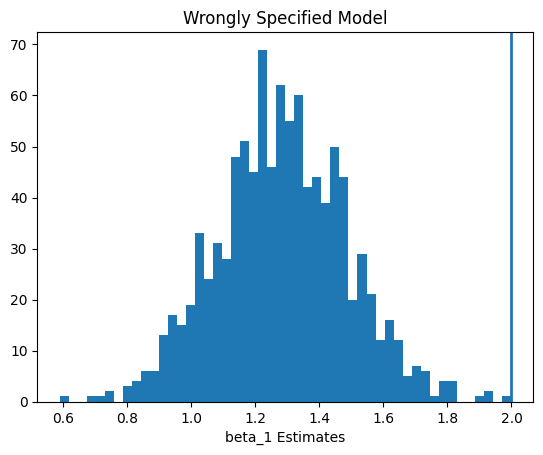

In [4]:
# --- 3) Monte Carlo: ill-specified model (Y ~ X1) estimating beta_1 ---

import statsmodels.api as sm
import matplotlib.pyplot as plt

sample_size = 50
M = 1000

betas_1 = np.empty(M)

n = len(complete_df)
for i in range(M):
    samp_idx = np.random.choice(n, size=sample_size, replace=False)
    sample_df = complete_df.iloc[samp_idx]

    X = sm.add_constant(sample_df["X1"])  # intercept
    model = sm.OLS(sample_df["Y"], X).fit()
    betas_1[i] = model.params["X1"]

mean_beta_1 = betas_1.mean()
sd_beta_1 = betas_1.std(ddof=1)

print(f"Expected value of beta_1 (MC): {mean_beta_1:.4f} | True value: {beta_1}")
print(f"Std. dev. of beta_1        : {sd_beta_1:.4f}")

plt.figure()
plt.hist(betas_1, bins=50)
plt.axvline(beta_1, linewidth=2)
plt.title("Wrongly Specified Model")
plt.xlabel("beta_1 Estimates")
plt.show()